Bottom boundary Layers
--------------------

This notebook compares the effect of the bottom drag flag on Barkley-like canyon runs 13, 15 and 16. The values of bottomDragquadratic are 0.002, 0.004 and 0.001 respectively.

In [1]:
#KRM
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

from netCDF4 import Dataset

import canyon_tools.readout_tools as rout

In [2]:
filename1a='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/stateGlob.nc'
StateOut = Dataset(filename1a)

filename2a='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc'
GridOut = Dataset(filename2a)

filename1b='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run05/stateGlob.nc'
StateOut = Dataset(filename1b)

filename2b='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run05/gridGlob.nc'
GridOut = Dataset(filename2b)

filename1c='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run06/stateGlob.nc'
StateOut = Dataset(filename1c)

filename1d='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/stateGlob.nc'
StateOut = Dataset(filename1d)

filename2d='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/gridGlob.nc'
GridOut = Dataset(filename2d)

filename1e='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run08/stateGlob.nc'
StateOut = Dataset(filename1e)

OSError: No such file or directory

In [4]:
# General input

nx = 360
ny = 360
nz = 90

nt = 19 # t dimension size 

z = StateOut.variables['Z']
#print(z[10])
Time = StateOut.variables['T']
#print(Time[:])

xc = rout.getField(filename2a, 'XC') # x coords tracer cells

yc = rout.getField(filename2a, 'YC') # y coords tracer cells

bathy = rout.getField(filename2a, 'Depth')

MaskW = rout.getMask(filename2a,'HFacW')
MaskWb = rout.getMask(filename2b,'HFacW')

MaskWnocan = rout.getMask(filename2d,'HFacW')

In [5]:
sns.set()
sns.set_style('white')
sns.set_context('paper')

/home/kramosmu/anaconda/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/home/kramosmu/anaconda/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


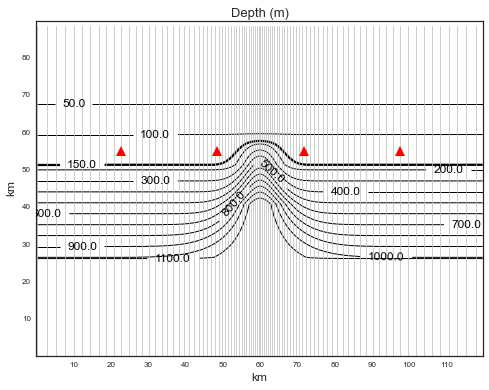

In [6]:
plt.rcParams.update({'font.size': 15})

fig = plt.figure(figsize=(8,6))

plt.plot(xc[::4,::4],yc[::4,::4],linewidth=0.75, linestyle='-', color='0.75')

plt.plot(xc[245,110],yc[245,110],'r^',markersize=10 )

plt.plot(xc[245,250],yc[245,250],'r^',markersize=10 )

plt.plot(xc[245,40],yc[245,40],'r^',markersize=10 )

plt.plot(xc[245,320],yc[245,320],'r^',markersize=10 )

plt.plot(xc[190,110],yc[190,110],'b^',markersize=10 )

plt.plot(xc[245,250],yc[245,250],'b^',markersize=10 )

plt.plot(xc[245,40],yc[245,40],'b^',markersize=10 )

plt.plot(xc[245,320],yc[245,320],'b^',markersize=10 )


lev = range(200,1200,100)

levels = [50,100,150]+lev

CS = plt.contour(xc,yc,bathy,levels,colors='k',linewidths=[1,1,2.25,1,1,1,1,1,1,1,1,1,1] )

plt.clabel(CS, 
           inline=1,
          fmt='%1.1f',
           fontsize=12)



plt.xticks(np.arange(0,120000,10000), [' ','10','20','30','40','50','60','70','80','90','100','110','120'])
plt.yticks(np.arange(0,90000,10000), [' ','10','20','30','40','50','60','70','80','90'])

plt.xlabel('km',fontsize=12)
plt.ylabel('km',fontsize=12)

plt.title('Depth (m)',fontsize=13)

fig.savefig('/ocean/kramosmu/Figures/BBLayer/BBLstations.eps', format='eps', dpi=1000)

#plt.savefig('AcrossShoreLines.pdf', bbox_inches='tight')



done with A
done with D
done with E
done with A
done with D
done with E
done with A
done with D
done with E
done with A
done with D
done with E


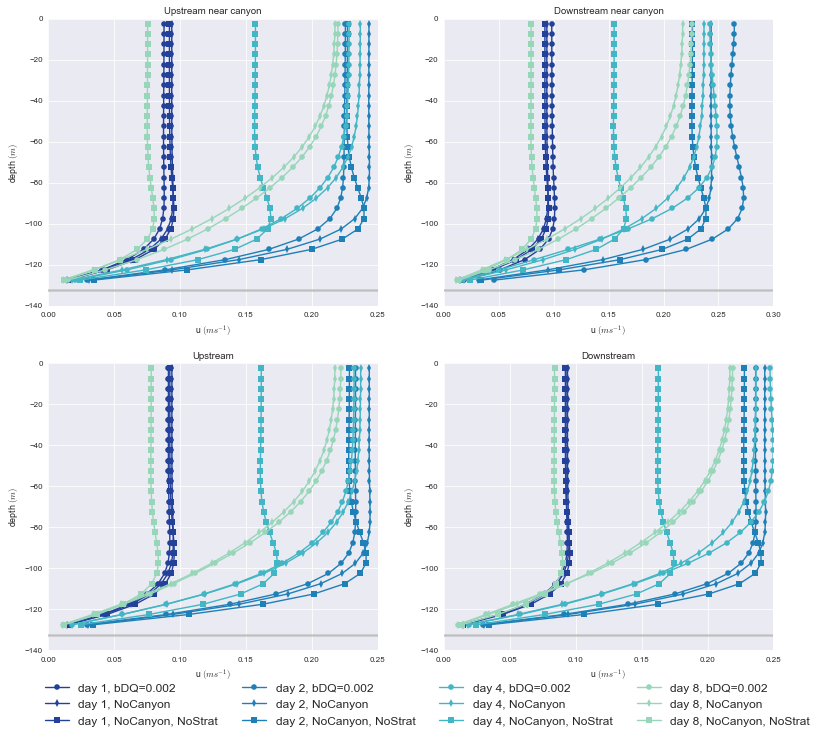

x1 location = 48392.7 m
y location = 54926.2 m
x2 location = 71848.0 m
x3 location = 22843.6 m
x4 location = 97649.3 m


In [7]:
#Profile alongshore velocity (u) from surface to shelf- bottom boundary layer over the shelf

params = {'legend.fontsize': 12}
plt.rcParams.update({'font.size':14})
plt.rcParams.update(params)
sns.set_style('darkgrid')

kk=1

fig45=plt.figure(figsize=(13,13))


colors = sns.color_palette("YlGnBu_r", n_colors=5)
times = [2,4,8,16]
legends = ['day 1', 'day 2','day 4','day 8']

for ii,tt in enumerate(times) :
        
        
        
        #Memory error if I try to load U,V to diffrent variables, so I overwrite ugrida and vgrida, v and u, and only save u masked.
        ###### RUN A #####
        ugrida = rout.getField(filename1a,'U')
        Trmaska=np.ma.array(ugrida[tt,:,:,:],mask=MaskW)
        
        plt.subplot(2,2,1)
        ax = plt.gca()
        plt.plot(Trmaska[0:28,245,110],z[0:28],'-o',color=colors[ii],label = legends[ii])
        
        plt.subplot(2,2,2)
        ax = plt.gca()
        plt.plot(Trmaska[0:28,245,250],z[0:28],'-o',color=colors[ii],label = legends[ii])
        
        plt.subplot(2,2,3)
        ax = plt.gca()
        plt.plot(Trmaska[0:28,245,40],z[0:28],'-o',color=colors[ii],label = legends[ii])
        
        plt.subplot(2,2,4)
        ax = plt.gca()
        plt.plot(Trmaska[0:28,245,320],z[0:28],'-o',color=colors[ii],label = ('%s, bDQ=0.002' %legends[ii]))
        
        print( 'done with A')

        ###### RUN D #####
        ugrida = rout.getField(filename1d,'U')
        Trmaska=np.ma.array(ugrida[tt,:,:,:],mask=MaskWnocan)
        
        plt.subplot(2,2,1)
        ax = plt.gca()
        plt.plot(Trmaska[0:28,245,110],z[0:28],'-d',color=colors[ii],label = legends[ii])
        
        plt.subplot(2,2,2)
        ax = plt.gca()
        plt.plot(Trmaska[0:28,245,250],z[0:28],'-d',color=colors[ii],label = legends[ii])
        
        plt.subplot(2,2,3)
        ax = plt.gca()
        plt.plot(Trmaska[0:28,245,40],z[0:28],'-d',color=colors[ii],label = legends[ii])
        
        plt.subplot(2,2,4)
        ax = plt.gca()
        plt.plot(Trmaska[0:28,245,320],z[0:28],'-d',color=colors[ii],label = ('%s, NoCanyon' %legends[ii]))
        
        print( 'done with D')
        ###### RUN E #####
        ugrida = rout.getField(filename1e,'U')
        Trmaska=np.ma.array(ugrida[tt,:,:,:],mask=MaskWnocan)
        
        plt.subplot(2,2,1)
        ax = plt.gca()
        plt.plot(Trmaska[0:28,245,110],z[0:28],'-s',color=colors[ii],label = legends[ii])
        
        plt.axhline(y=z[26],xmin=-0.05,xmax=1,linestyle='-', color='0.75')
        plt.gca().invert_yaxis()
        plt.title('Upstream near canyon')
        plt.xlabel('u $(ms^{-1})$')
        plt.ylabel('depth $(m)$')
       
        plt.subplot(2,2,2)
        ax = plt.gca()
        plt.plot(Trmaska[0:28,245,250],z[0:28],'-s',color=colors[ii],label = legends[ii])
        
        plt.axhline(y=z[26],xmin=-0.05,xmax=1,linestyle='-', color='0.75')
        plt.gca().invert_yaxis()
        plt.title('Downstream near canyon')
        plt.xlabel('u $(ms^{-1})$')
        plt.ylabel('depth $(m)$')
        
        plt.subplot(2,2,3)
        ax = plt.gca()
        plt.plot(Trmaska[0:28,245,40],z[0:28],'-s',color=colors[ii],label = legends[ii])
        
        plt.axhline(y=z[26],xmin=-0.05,xmax=1,linestyle='-', color='0.75')
        plt.gca().invert_yaxis()
        plt.title('Upstream')
        plt.xlabel('u $(ms^{-1})$')
        plt.ylabel('depth $(m)$')
        
        plt.subplot(2,2,4)
        ax = plt.gca()
        plt.plot(Trmaska[0:28,245,320],z[0:28],'-s',color=colors[ii],label = ('%s, NoCanyon, NoStrat' %legends[ii]))
        ax.invert_yaxis()
        plt.axhline(y=z[26],xmin=-0.05,xmax=1,linestyle='-', color='0.75')
        plt.title('Downstream')
        plt.xlabel('u $(ms^{-1})$')
        plt.ylabel('depth $(m)$')
        leg = plt.legend(ncol=4, bbox_to_anchor=(-0.05, -0.28),loc=8, borderaxespad=0.)
        print('done with E')

#plt.tight_layout()
fig45.subplots_adjust(top=0.8)
#fig45.savefig('/ocean/kramosmu/Figures/BBLayer/bDQ002_NoCanyon_NoStrat.eps', format='eps', dpi=1000,bbox_extra_artists=(leg,))

plt.show()
print("x1 location = %1.1f m" % xc[245,110])
print("y location = %1.1f m" % yc[245,110])
print("x2 location = %1.1f m" % xc[245,250])
print("x3 location = %1.1f m" % xc[245,40])
print("x4 location = %1.1f m" % xc[245,320])


done with A
done with B
done with C
done with A
done with B
done with C
done with A
done with B
done with C
done with A
done with B
done with C


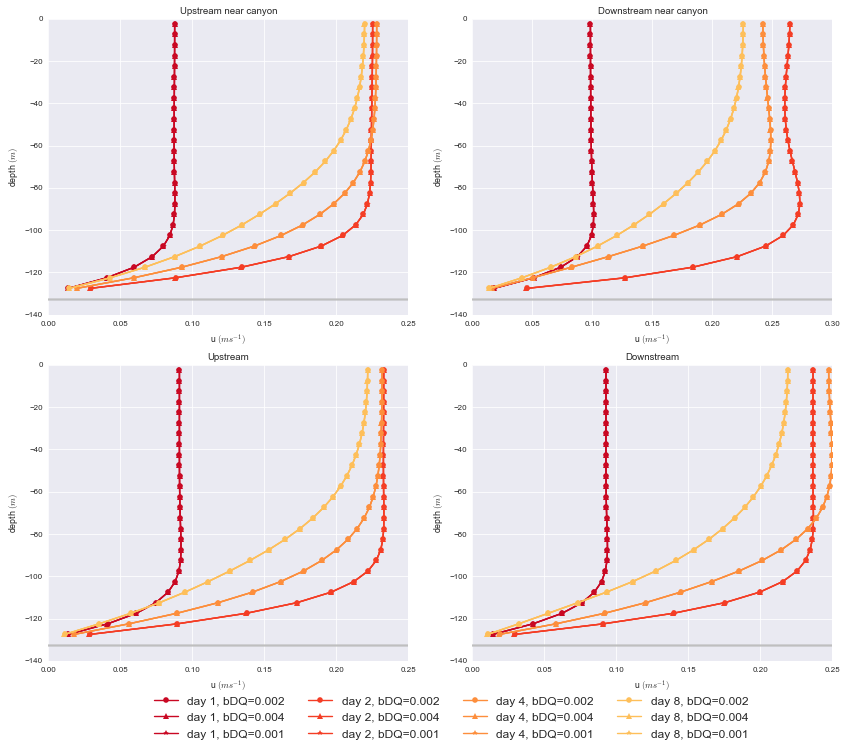

x1 location = 48392.7 m
y location = 54926.2 m
x2 location = 71848.0 m
x3 location = 22843.6 m
x4 location = 97649.3 m


In [8]:
#Profile alongshore velocity (u) from surface to shelf- bottom boundary layer over the shelf

params = {'legend.fontsize': 12}
plt.rcParams.update({'font.size':14})
plt.rcParams.update(params)
sns.set_style('darkgrid')

kk=1

fig46=plt.figure(figsize=(12,12))
colors = sns.color_palette("YlOrRd_r", n_colors=5)
times = [2,4,8,16]
legends = ['day 1', 'day 2','day 4','day 8']


for ii,tt in enumerate(times) :
        
        
        
        #Memory error if I try to load U,V to diffrent variables, so I overwrite ugrida and vgrida, v and u, and only save u masked.
        ###### RUN A #####
        ugrida = rout.getField(filename1a,'U')
        Trmaska=np.ma.array(ugrida[tt,:,:,:],mask=MaskW)
        
        plt.subplot(2,2,1)
        ax = plt.gca()
        plt.plot(Trmaska[0:28,245,110],z[0:28],'-o',color=colors[ii],label = ('%s, bDQ=0.002' %legends[ii]))
        
        plt.subplot(2,2,2)
        ax = plt.gca()
        plt.plot(Trmaska[0:28,245,250],z[0:28],'-o',color=colors[ii],label = ('%s, bDQ=0.002' %legends[ii]))
        
        plt.subplot(2,2,3)
        ax = plt.gca()
        plt.plot(Trmaska[0:28,245,40],z[0:28],'-o',color=colors[ii],label = ('%s, bDQ=0.002' %legends[ii]))
        
        plt.subplot(2,2,4)
        ax = plt.gca()
        plt.plot(Trmaska[0:28,245,320],z[0:28],'-o',color=colors[ii],label = ('%s, bDQ=0.002' %legends[ii]))
        
        print( 'done with A')

        ###### RUN B #####
        ugrida = rout.getField(filename1b,'U')
        Trmaska=np.ma.array(ugrida[tt,:,:,:],mask=MaskWb)
        
        plt.subplot(2,2,1)
        ax = plt.gca()
        plt.plot(Trmaska[0:28,245,110],z[0:28],'-^',color=colors[ii],label = ('%s, bDQ=0.004' %legends[ii]))
        
        plt.subplot(2,2,2)
        ax = plt.gca()
        plt.plot(Trmaska[0:28,245,250],z[0:28],'-^',color=colors[ii],label = ('%s, bDQ=0.004' %legends[ii]))
        
        plt.subplot(2,2,3)
        ax = plt.gca()
        plt.plot(Trmaska[0:28,245,40],z[0:28],'-^',color=colors[ii],label = ('%s, bDQ=0.004' %legends[ii]))
        
        plt.subplot(2,2,4)
        ax = plt.gca()
        plt.plot(Trmaska[0:28,245,320],z[0:28],'-^',color=colors[ii],label = ('%s, bDQ=0.004' %legends[ii]))
        
        print( 'done with B')
        ###### RUN C #####
        ugrida = rout.getField(filename1c,'U')
        Trmaska=np.ma.array(ugrida[tt,:,:,:],mask=MaskWb)
        
        plt.subplot(2,2,1)
        ax = plt.gca()
        plt.plot(Trmaska[0:28,245,110],z[0:28],'-*',color=colors[ii],label =  ('%s, bDQ=0.001' %legends[ii]))
        
        plt.axhline(y=z[26],xmin=-0.05,xmax=1,linestyle='-', color='0.75')
        plt.gca().invert_yaxis()
        plt.title('Upstream near canyon')
        plt.xlabel('u $(ms^{-1})$')
        plt.ylabel('depth $(m)$')
       
        plt.subplot(2,2,2)
        ax = plt.gca()
        plt.plot(Trmaska[0:28,245,250],z[0:28],'-*',color=colors[ii],label =  ('%s, bDQ=0.001' %legends[ii]))
        
        plt.axhline(y=z[26],xmin=-0.05,xmax=1,linestyle='-', color='0.75')
        plt.gca().invert_yaxis()
        plt.title('Downstream near canyon')
        plt.xlabel('u $(ms^{-1})$')
        plt.ylabel('depth $(m)$')
        
        plt.subplot(2,2,3)
        ax = plt.gca()
        plt.plot(Trmaska[0:28,245,40],z[0:28],'-*',color=colors[ii],label =  ('%s, bDQ=0.001' %legends[ii]))
        
        plt.axhline(y=z[26],xmin=-0.05,xmax=1,linestyle='-', color='0.75')
        plt.gca().invert_yaxis()
        plt.title('Upstream')
        plt.xlabel('u $(ms^{-1})$')
        plt.ylabel('depth $(m)$')
        
        plt.subplot(2,2,4)
        ax = plt.gca()
        plt.plot(Trmaska[0:28,245,320],z[0:28],'-*',color=colors[ii],label =  ('%s, bDQ=0.001' %legends[ii]))
        ax.invert_yaxis()
        plt.axhline(y=z[26],xmin=-0.05,xmax=1,linestyle='-', color='0.75')
        plt.title('Downstream')
        plt.xlabel('u $(ms^{-1})$')
        plt.ylabel('depth $(m)$')
        leg=plt.legend(ncol=4, bbox_to_anchor=(-0.06, -0.28),loc=8, borderaxespad=0.)
        print('done with C')

plt.tight_layout()
fig46.subplots_adjust(top=0.8)
fig46.savefig('/ocean/kramosmu/Figures/BBLayer/bDQ002_bDQ004_bDQ001.eps', format='eps', dpi=1000, bbox_extra_artists=(leg,), bbox_inches='tight')

plt.show()
print("x1 location = %1.1f m" % xc[245,110])
print("y location = %1.1f m" % yc[245,110])
print("x2 location = %1.1f m" % xc[245,250])
print("x3 location = %1.1f m" % xc[245,40])
print("x4 location = %1.1f m" % xc[245,320])
